# FEATURE EXTRACTION

In this notebook, you will learn to extract acoustic features from spoken utterances (audio signals) through the **OpenSMILE** and **OpenXBOW** toolkits. To do so, we need a dataset to work with: we will use **EmoDB**. 

# EmoDB

Berlin Database of Emotional Speech

EmoDB is a database of emotional speech in German recorded by 10 professional actors producing different utterances in seven emotional states: happiness, anger, fear, sadness, boredom, disgust, and neutral. A total of 10 different utterances has been considered, although not all actors produce all the utterances in all the emotions. EmoDB contains 535 samples. 

Please download the complete dataset via the following link:

http://emodb.bilderbar.info/download/

Once downloaded the database, you should have all the content organized in subfolders, with the audio files in the folder `wav/`. Please **copy the wav folder into your jupyter-notebooks working directory**.

## File naming convention

Exploring the content of the folder wav, you find that the filenames have a specific naming convention. This is something important to consider in order to extract the target and the speaker IDs, a preliminary step necessary to perform subsequent Machine Learning (ML) tasks. 

***The naming convention of the files is the following:***

Speaker ID: file_name[:2] -> the 2 first letters

Utterance ID: file_name[2:5] -> the 3 middle letters

Emotional class: file_name[-2:-1] -> the pre-last letter

Utterance version: file_name[-1:] -> the last letter (a, b, ...)

***Thus, the file name '03a04Nc' should be interpreted as follows:***

Speaker ID: 03

Utterance ID: a04

Emotional class: N (=Neutral)

Utterance version: third

### Code of emotions:

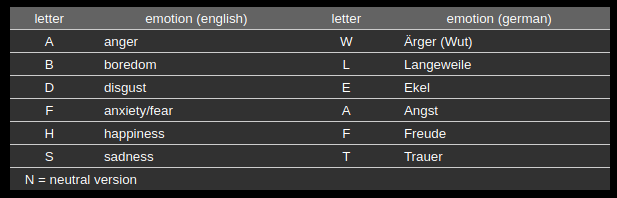

The full information about speakers, utterances, and emotional classes can be found in the section 'Additional Information' at: 

http://emodb.bilderbar.info/index-1280.html

# OpenSMILE

OpenSMILE (Media Interpretation by Large-space Extraction) is an open-source feature extraction tool that enables to extract large audio feature spaces in real time. It combines features from Music Information Retrieval and Speech Processing. 

**NOTE:** The presented jupyter-notebook contains minimal selected information with the specific purpose of using OpenSMILE in the presented course. For an overview of all the functionalities of OpenSMILE, please refer to the official documentation: 

https://audeering.github.io/opensmile/index.html

A theoretical description of the implemented algorithms can be found in Florian Eyben’s doctoral thesis entitled “Real-time Speech and Music Classification by Large Audio Feature Space Extraction” (2015). 

## Install and Import OpenSMILE

In the following, we will work with OpenSMILE's Python interface. 

The official documentation can be accessed here: https://audeering.github.io/opensmile-python/index.html

For updates/contribution, refer to the official GitHub repository: https://github.com/audeering/opensmile-python  

1. First you need to install opensmile via pip (execute the cell below to do so)

In [1]:
# Installing opensmile via pip
#!pip install opensmile

2. You might need to update some packages. If that is needed, follow the example below where the package <code>pyyaml</code> is updated. 

In [2]:
# update required packages if needed
#!pip install --upgrade pyyaml

3. Now you are ready to import OpenSMILE. (A Warning concerning "sox" can be safely ignored.)

In [3]:
import opensmile

### Extracting eGeMAPS LLDs from an audio file
We will start by extracting LLDs from one audio file.

In [4]:
import os
import audiofile
import pandas as pd

# Define variables
my_dir = os.getcwd()
emoDB  = my_dir + '/wav/'
file   = emoDB + '03a01Nc.wav'

# Define feature extractor to get LLDs from the eGeMAPS (v02) feature set
smile_LLDs = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.LowLevelDescriptors,
)

# Extract the features
LLDs = smile_LLDs.process_file(file)

LLDs

Loudness_sma3  \
file                                               start                  end                                        
/home/c/Schreibtisch/ba_08102022/feature_extrac... 0 days 00:00:00        0 days 00:00:00.020000          0.004426   
                                                   0 days 00:00:00.010000 0 days 00:00:00.030000          0.004407   
                                                   0 days 00:00:00.020000 0 days 00:00:00.040000          0.004641   
                                                   0 days 00:00:00.030000 0 days 00:00:00.050000          0.004690   
                                                   0 days 00:00:00.040000 0 days 00:00:00.060000          0.004628   
...                                                                                                            ...   
                                                   0 days 00:00:40.970000 0 days 00:00:40.990000          0.004452   
                                                   0 days 00:00:40.980000 0 days 00:00:41                 0.004958   
                                                   0 days 00:00:40.990000 0 days 00:00:41.010000          0.005424   
                                                   0 days 00:00:41        0 days 00:00:41.020000          0.005348   
                                                   0 days 00:00:41.010000 0 days 00:00:41.064535147       0.004808   

                                                                                                     alphaRatio_sma3  \
file                                               start                  end                                          
/home/c/Schreibtisch/ba_08102022/feature_extrac... 0 days 00:00:00        0 days 00:00:00.020000            7.545125   
                                                   0 days 00:00:00.010000 0 days 00:00:00.030000            8.062446   
                                                   0 days 00:00:00.020000 0 days 00:00:00.040000            8.889485   
                                                   0 days 00:00:00.030000 0 days 00:00:00.050000            7.719672   
                                                   0 days 00:00:00.040000 0 days 00:00:00.060000            6.456397   
...                                                                                                              ...   
                                                   0 days 00:00:40.970000 0 days 00:00:40.990000            7.051553   
                                                   0 days 00:00:40.980000 0 days 00:00:41                   8.507344   
                                                   0 days 00:00:40.990000 0 days 00:00:41.010000            9.719180   
                                                   0 days 00:00:41        0 days 00:00:41.020000            8.963808   
                                                   0 days 00:00:41.010000 0 days 00:00:41.064535147         9.488246   

                                                                                                     hammarbergIndex_sma3  \
file                                               start                  end                                               
/home/c/Schreibtisch/ba_08102022/feature_extrac... 0 days 00:00:00        0 days 00:00:00.020000                -0.991286   
                                                   0 days 00:00:00.010000 0 days 00:00:00.030000                -1.622248   
                                                   0 days 00:00:00.020000 0 days 00:00:00.040000                -1.575231   
                                                   0 days 00:00:00.030000 0 days 00:00:00.050000                -1.194683   
                                                   0 days 00:00:00.040000 0 days 00:00:00.060000                 1.168568   
...                                                                                                                   ...   
     

In [5]:
print('We have extracted', len(LLDs.columns), 'LLDs over', len(LLDs), 'frames')  # Note that the multilevel index is not counted as a column

We have extracted 25 LLDs over 4102 frames


Now, we will save the LLDs into a csv file.

In [6]:
# Create a folder to save the results
if not os.path.exists(my_dir + '/RESULTS'):
    os.mkdir(my_dir + '/RESULTS')
out_LLDs_oneFile = my_dir + '/RESULTS/LLDs_oneFile.csv'

# Create csv file
LLDs.to_csv(out_LLDs_oneFile, index=False)  # remember to drop the index 

Finally, we will verify that the saved LLDs contains the correct number of columns and rows, i.e., the same previously shown.

In [7]:
# Open csv of LLDs in pandas
LLD_df = pd.read_csv(out_LLDs_oneFile)
print('We have extracted', len(LLD_df.columns), 'LLDs over', len(LLD_df), 'frames')

We have extracted 25 LLDs over 4102 frames


### Extracting eGeMAPS functionals from an audio file
We will now extract the functionals from the same audio file as before.

In [8]:
# Define feature extractor to get functionals from the eGeMAPS (v02) feature set
smile_func = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.Functionals,
)

# Extract the features
functionals = smile_func.process_file(file)

functionals

,,,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp
file,start,end,,,,,,,,,,,,,,,,,,,,,
/home/c/Schreibtisch/ba_08102022/feature_extraction_packages/wav/03a01Nc.wav,0 days,0 days 00:00:41.064535147,25.568483,0.483277,13.657864,20.250208,38.126949,24.469086,310.87677,480.974579,196.779449,331.731445,...,-0.048011,-0.015146,0.857675,2.947625,3.0,0.216992,0.280516,0.120417,0.148113,-24.651159


In [9]:
print('We have extracted', len(functionals.columns), 'functionals for', len(functionals), 'file')

We have extracted 88 functionals for 1 file


Now, we will save the functionals into a csv file, as we made for the LLDs.

In [10]:
# Create a folder to save the results
if not os.path.exists(my_dir + '/RESULTS'):
    os.mkdir(my_dir + '/RESULTS')
out_functionals_oneFile = my_dir + '/RESULTS/functionals_oneFile.csv'

# Create csv file
functionals.to_csv(out_functionals_oneFile, index=False)  # remember to drop the index

Finally, we will verify that the saved functionals contain the correct number of columns and rows, i.e., the same shown previously.

In [11]:
# Open csv of functionals in pandas
functionals_df = pd.read_csv(out_functionals_oneFile)
print('We have extracted', len(functionals_df.columns), 'functionals for', len(functionals_df), 'file')

We have extracted 88 functionals for 1 file


## How many LLDs and functionals?

Let's explore how many LLDs and functionals encompass each of the considered feature sets. As you see we have the expected number of LLDs and functionals for the eGeMAPS feature set (as indicated in the slides), i.e., 88 functionals and 25 LLDs. 

In [12]:
print('eGeMAPS contains', len(LLDs.columns), 'LLDs')
print('eGeMAPS contains', len(functionals.columns), 'functionals')

eGeMAPS contains 25 LLDs
eGeMAPS contains 88 functionals


## Selecting feature groups

Feature sets are divided into different feature classes:

- eGeMAPS: frequency, energy/amplitude, and spectral
- ComParE: Mel-Frequency Cepstral Coefficients (MFCC), spectral, prosodic, and voice quality 


In the following, we will get the LLDs of each specific class in the eGeMAPS feature set.

In [13]:
# define lists with the feature names
freq_features = ['HNRdBACF_sma3nz', 'F3frequency_sma3nz', 'F2frequency_sma3nz', 'F1frequency_sma3nz', 'jitterLocal_sma3nz', 'F0semitoneFrom27.5Hz_sma3nz', 'F1bandwidth_sma3nz', 'F2bandwidth_sma3nz', 'F3bandwidth_sma3nz', 'logRelF0-H1-H2_sma3nz', 'logRelF0-H1-A3_sma3nz']
ampl_features = ['alphaRatio_sma3', 'hammarbergIndex_sma3', 'Loudness_sma3', 'F1amplitudeLogRelF0_sma3nz', 'F3amplitudeLogRelF0_sma3nz', 'F2amplitudeLogRelF0_sma3nz', 'shimmerLocaldB_sma3nz']
spec_features = ['spectralFlux_sma3', 'slope0-500_sma3', 'slope500-1500_sma3', 'mfcc1_sma3', 'mfcc2_sma3', 'mfcc3_sma3', 'mfcc4_sma3']

LLD_egemaps_freq = LLDs[freq_features]
LLD_egemaps_ampl = LLDs[ampl_features]
LLD_egemaps_spec = LLDs[spec_features]
LLD_egemaps_freq

HNRdBACF_sma3nz  \
file                                               start                  end                                          
/home/c/Schreibtisch/ba_08102022/feature_extrac... 0 days 00:00:00        0 days 00:00:00.020000                 0.0   
                                                   0 days 00:00:00.010000 0 days 00:00:00.030000                 0.0   
                                                   0 days 00:00:00.020000 0 days 00:00:00.040000                 0.0   
                                                   0 days 00:00:00.030000 0 days 00:00:00.050000                 0.0   
                                                   0 days 00:00:00.040000 0 days 00:00:00.060000                 0.0   
...                                                                                                              ...   
                                                   0 days 00:00:40.970000 0 days 00:00:40.990000                 0.0   
                                                   0 days 00:00:40.980000 0 days 00:00:41                        0.0   
                                                   0 days 00:00:40.990000 0 days 00:00:41.010000                 0.0   
                                                   0 days 00:00:41        0 days 00:00:41.020000                 0.0   
                                                   0 days 00:00:41.010000 0 days 00:00:41.064535147              0.0   

                                                                                                     F3frequency_sma3nz  \
file                                               start                  end                                             
/home/c/Schreibtisch/ba_08102022/feature_extrac... 0 days 00:00:00        0 days 00:00:00.020000            2436.135498   
                                                   0 days 00:00:00.010000 0 days 00:00:00.030000            2434.620117   
                                                   0 days 00:00:00.020000 0 days 00:00:00.040000            2388.415771   
                                                   0 days 00:00:00.030000 0 days 00:00:00.050000            2377.473877   
                                                   0 days 00:00:00.040000 0 days 00:00:00.060000            2369.697021   
...                                                                                                                 ...   
                                                   0 days 00:00:40.970000 0 days 00:00:40.990000            2346.407227   
                                                   0 days 00:00:40.980000 0 days 00:00:41                   2379.168945   
                                                   0 days 00:00:40.990000 0 days 00:00:41.010000            2370.533447   
                                                   0 days 00:00:41        0 days 00:00:41.020000            2337.660889   
                                                   0 days 00:00:41.010000 0 days 00:00:41.064535147         2504.214844   

                                                                                                     F2frequency_sma3nz  \
file                                               start                  end                                             
/home/c/Schreibtisch/ba_08102022/feature_extrac... 0 days 00:00:00        0 days 00:00:00.020000            1518.381836   
                                                   0 days 00:00:00.010000 0 days 00:00:00.030000            1512.424683   
                                                   0 days 00:00:00.020000 0 days 00:00:00.040000            1524.943481   
                                                   0 days 00:00:00.030000 0 days 00:00:00.050000            1513.588501   
                                                   0 days 00:00:00.040000 0 days 00:00:00.060000            1571.372192   
...                                                                            

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#42c556">
<p style="padding: 10px;
              color:white;">
<span style="font-size:30px;">In-class Exercise / Homework</span>
    
<span style="font-size:18px;">Following the given examples, carry out the tasks described below:

1. Extract LLDs, Delta coefficients, and functionals of the ComParE feature set.

2. Filter out only the MFCCs from the LLDs, Delta coefficients, and the functionals and save them into three individual csv files.</span>

HINT: You might want to have a look to the documentation here: https://audeering.github.io/opensmile-python/api-smile.html
</p>
</div>

## Extracting features from the whole EmoDB

In the following cells, you will learn how to extract the functionals and LLDs from the whole EmoDB dataset, considering the eGeMAPS feature set.  For the LLDs, one csv file will be generated per sample, while for the functionals, one unique csv file will be generated for the whole dataset (remember that the functionals for each sample are codified in a unique row). 

### Extracting eGeMAPS LLDs from several audio files
We will start by extracting LLDs from all the audio files of EmoDB.

In [14]:
import glob

# Create a folder to save the results
if not os.path.exists(my_dir + '/RESULTS/LLD'):
    os.mkdir(my_dir + '/RESULTS/LLD')

# Extract the features
## create empty dictionary to fill it with the labels and IDs
labels_ID = {'label': [], 'ID': [], 'name': []}
## loop over the audio files to extract the LLDs
for file in glob.glob(os.path.join(emoDB, '*.wav')):
    file_name  = os.path.basename(file[0:-4])
    speaker_ID = file_name[0:2]
    label      = file_name[-2:-1]
    ## append the labels and IDs in the dictionary for each wav file
    labels_ID['label'].append(label)
    labels_ID['ID'].append(speaker_ID)
    labels_ID['name'].append(file_name)
    ## extract LLDs for each audio file
    LLDs = smile_LLDs.process_file(file)
    # Create csv file
    csv_name = my_dir + '/RESULTS/LLD/' + file_name + '.csv'
    LLDs.to_csv(csv_name, index=False)  # remember to drop the index  

## convert the IDs dictionary into a dataframe
df = pd.DataFrame.from_dict(labels_ID)
print(df)
## save the ID's dataframe as a csv to have it for the future (we extract the features only once)
df.to_csv(my_dir + '/RESULTS/labels_ID.csv', sep='\t', index = False)

  label  ID      name
0     N  03   03a01Nc
1     c  03  03a01Nc2


Now, let's verify that the generated csv file for "03a01Nc" (i.e., the same audio file already considered in the previous example) is the same as the one generated above. For this, we are going to open it with pandas and have a look at the number of LLDs and frames.

In [15]:
LLD_03a01Nc = pd.read_csv(my_dir + '/RESULTS/LLD/03a01Nc.csv')
LLD_03a01Nc
print('We have extracted', len(LLD_03a01Nc.columns), 'LLDs over', len(LLD_03a01Nc), 'frames')

We have extracted 25 LLDs over 4102 frames


### Extracting eGeMAPS functionals from several audio files
We will now extract the functionals from the all the audio files.

In [16]:
# get list of paths for all the files
all_files = glob.glob(os.path.join(emoDB, '*.wav'))

# extract functionals for all the files in a dataframe
functionals = smile_func.process_files(all_files)
functionals

,,,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp
file,start,end,,,,,,,,,,,,,,,,,,,,,
/home/c/Schreibtisch/ba_08102022/feature_extraction_packages/wav/03a01Nc.wav,0 days,0 days 00:00:41.064535147,25.568483,0.483277,13.657864,20.250208,38.126949,24.469086,310.87677,480.974579,196.779449,331.731445,...,-0.048011,-0.015146,0.857675,2.947625,3.0,0.216992,0.280516,0.120417,0.148113,-24.651159
/home/c/Schreibtisch/ba_08102022/feature_extraction_packages/wav/03a01Nc2.wav,0 days,0 days 00:00:41.064535147,25.568483,0.483277,13.657864,20.250208,38.126949,24.469086,310.87677,480.974579,196.779449,331.731445,...,-0.048011,-0.015146,0.857675,2.947625,3.0,0.216992,0.280516,0.120417,0.148113,-24.651159


In [17]:
# clean up the index
functionals.reset_index(inplace=True)
functionals['file'] = functionals['file'].apply(os.path.basename)
try:
    del functionals['start']
    del functionals['end']
except:
    pass
functionals.set_index(['file'], inplace=True)

#save data frame to csv
functionals.to_csv(my_dir + '/RESULTS/functionals_all.csv')  # now we keep the index since we will need the file name as we have more than one 
functionals

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp
file,,,,,,,,,,,,,,,,,,,,,
03a01Nc.wav,25.568483,0.483277,13.657864,20.250208,38.126949,24.469086,310.87677,480.974579,196.779449,331.731445,...,-0.048011,-0.015146,0.857675,2.947625,3.0,0.216992,0.280516,0.120417,0.148113,-24.651159
03a01Nc2.wav,25.568483,0.483277,13.657864,20.250208,38.126949,24.469086,310.87677,480.974579,196.779449,331.731445,...,-0.048011,-0.015146,0.857675,2.947625,3.0,0.216992,0.280516,0.120417,0.148113,-24.651159


Now, let's verify that the generated csv contains the expected number of functionals and files. For this, we are going to open it with pandas and have a look at the number of columns, which should be 88, i.e., equal to the number of functionals (note that the file name is indicated as the index: index_col=0). The number of rows should be 535, i.e., equal to the number of audio files.

In [18]:
functionals_csv = pd.read_csv(my_dir + '/RESULTS/functionals_all.csv', index_col=0)
print('We have extracted', len(functionals_csv.columns), 'functionals from', len(functionals_csv), 'files')
functionals_csv

We have extracted 88 functionals from 2 files


,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp
file,,,,,,,,,,,,,,,,,,,,,
03a01Nc.wav,25.568483,0.483277,13.657864,20.250208,38.12695,24.469086,310.87677,480.97458,196.77945,331.73145,...,-0.048011,-0.015146,0.857675,2.947625,3.0,0.216992,0.280516,0.120417,0.148113,-24.65116
03a01Nc2.wav,25.568483,0.483277,13.657864,20.250208,38.12695,24.469086,310.87677,480.97458,196.77945,331.73145,...,-0.048011,-0.015146,0.857675,2.947625,3.0,0.216992,0.280516,0.120417,0.148113,-24.65116


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#42c556">
<p style="padding: 10px;
              color:white;">
<span style="font-size:30px;">In-class Exercise/Homework</span>
    
<span style="font-size:18px;">Following the given examples, carry out the tasks described below:
    
1. Extract LLDs, Delta coefficients, and functionals from the ComParE feature set, this time for all the samples in EmoDB.
    
2. Merge the LLDs and Deltas in the same csv file (this is their typical use).

3. Filter out only the MFCCs from the LLDs + Deltas, as well as from the functionals, and save them into two individual csv files.</span>

HINT: You might want to have a look to the documentation here: https://audeering.github.io/opensmile-python/api-smile.html
</p>
</div>

# OpenXBOW

The Passau Open-Source Crossmodal Bag-of-Words Toolkit
openXBOW generates a Bag-of-Words representation from a sequence of numeric and/or textual features, e.g., acoustic LLDs, visual features, and transcriptions of natural speech.

For further details and examples, refer to the official documentation: https://github.com/openXBOW/openXBOW 

As well as to the publication: Maximilian Schmitt and Björn Schuller: *OpenXBOW - Introducing the Passau Open-Source Crossmodal Bag-of-Words Toolkit*, The Journal of Machine Learning Research, Volume 18, No. 96, pp. 1-5, October 2017.

### Extracting BoAW from LLDs

We will use the LLDs from all the speakers except for those with IDs 03 and 08 to generate the codebook; then, we will extract *Bag-of-Audio-Words* for all the speakers. For this, we first create two dataframes: one containing the LLDs for the speakers 03 and 08 (these would be retained for test in an ML task); another dataframe with the LLDs from all speakers.

In [19]:
# Create a folder to save the results for BoW
if not os.path.exists(my_dir + '/RESULTS/BoW_resources'):
    os.mkdir(my_dir + '/RESULTS/BoW_resources')

# set variables
LLD_egemaps = my_dir + '/RESULTS/LLD/'
codebook_df = pd.DataFrame()
all_df = pd.DataFrame()

# loop through the csv files and split them into two dataframes
for file in sorted(glob.glob(os.path.join(LLD_egemaps, '*.csv'))):
    file_name  = os.path.basename(file[0:-4])
    speaker_ID = file_name[0:2]
    file_df = pd.read_csv(LLD_egemaps + os.path.basename(file))
    file_df.insert(0, 'file_name', file_name)
    if speaker_ID != '03' and speaker_ID != '08':
        codebook_df = codebook_df.append(file_df)
    all_df = all_df.append(file_df)

# save the dataframes into 2 new csv files: codebook and all
codebook_df.to_csv(my_dir + '/RESULTS/BoW_resources/codebook.csv', index=False)
all_df.to_csv(my_dir + '/RESULTS/BoW_resources/all.csv', index=False)

In [20]:
all_df

,file_name,Loudness_sma3,alphaRatio_sma3,hammarbergIndex_sma3,slope0-500_sma3,slope500-1500_sma3,spectralFlux_sma3,mfcc1_sma3,mfcc2_sma3,mfcc3_sma3,...,logRelF0-H1-A3_sma3nz,F1frequency_sma3nz,F1bandwidth_sma3nz,F1amplitudeLogRelF0_sma3nz,F2frequency_sma3nz,F2bandwidth_sma3nz,F2amplitudeLogRelF0_sma3nz,F3frequency_sma3nz,F3bandwidth_sma3nz,F3amplitudeLogRelF0_sma3nz
0,03a01Nc,0.004426,7.545126,-0.991286,0.085359,0.012827,0.000021,-13.303159,-6.378275,-5.895651,...,0.0,426.96924,579.70040,-201.0,1518.3818,492.47310,-201.0,2436.1355,758.88810,-201.0
1,03a01Nc,0.004407,8.062446,-1.622248,0.082205,0.012909,0.000042,-14.185344,-6.066528,-4.418707,...,0.0,438.89404,536.88446,-201.0,1512.4247,495.82210,-201.0,2434.6200,724.70135,-201.0
2,03a01Nc,0.004641,8.889485,-1.575231,0.076260,0.014412,0.000070,-14.134172,-5.510353,-3.039490,...,0.0,442.93143,508.64127,-201.0,1524.9435,644.32830,-201.0,2388.4158,632.30470,-201.0
3,03a01Nc,0.004690,7.719672,-1.194683,0.067319,0.015914,0.000080,-12.989902,-4.546068,-3.795514,...,0.0,458.23184,526.36930,-201.0,1513.5885,693.95920,-201.0,2377.4739,568.82355,-201.0
4,03a01Nc,0.004628,6.456397,1.168568,0.049794,0.019162,0.000083,-12.961070,-2.375565,-4.007760,...,0.0,518.00610,463.65390,-201.0,1571.3722,774.01196,-201.0,2369.6970,639.67790,-201.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4097,03a01Nc2,0.004452,7.051553,-0.687027,0.072450,0.017040,0.000072,-10.987137,-2.051534,-3.771892,...,0.0,479.64860,590.78860,-201.0,1484.4943,812.18430,-201.0,2346.4072,664.67255,-201.0
4098,03a01Nc2,0.004958,8.507344,-0.533919,0.084322,0.021341,0.000082,-12.536605,-3.953501,-5.240343,...,0.0,459.43466,552.77810,-201.0,1468.2545,831.05660,-201.0,2379.1690,558.79130,-201.0
4099,03a01Nc2,0.005424,9.719180,-0.530961,0.081060,0.022236,0.000087,-14.339706,-7.041513,-5.032617,...,0.0,461.54532,604.50750,-201.0,1434.9648,928.65800,-201.0,2370.5334,492.41104,-201.0
4100,03a01Nc2,0.005348,8.963808,-1.073323,0.077881,0.023094,0.000090,-14.566827,-6.951332,-6.830679,...,0.0,493.36954,694.02760,-201.0,1454.9342,965.88336,-201.0,2337.6610,574.42053,-201.0


In [21]:
codebook_df

""


### Generating the codebook

The first step to be able to extract the Bag-of-Audio-Words is to generate a codebook. We will do it in the next cell by considering all the data of EmoDB except the utterances produced by speakers 03 and 08.

In [22]:
# generate codebook
codebook_files  = my_dir + '/RESULTS/BoW_resources/codebook.csv'
os.system('java -jar openXBOW.jar -i ' + codebook_files + ' -B codebook -size 250 -log -a 10 -standardizeInput')

Parsing input ...


Exception in thread "main" java.lang.IndexOutOfBoundsException: Index: 0, Size: 0
	at java.util.ArrayList.rangeCheck(ArrayList.java:659)
	at java.util.ArrayList.get(ArrayList.java:435)
	at openxbow.io.Reader.readFile(Reader.java:179)
	at openxbow.main.OpenXBOW.main(OpenXBOW.java:64)


256

### Extracting BoAW

After we have created the codebook, we can now extract Bag-of-Audio-Words for all the samples in the dataset. 

In [23]:
options   = ' -writeName -csvHeader'
all_files = my_dir + '/RESULTS/BoW_resources/all.csv'
os.system('java -jar openXBOW.jar -i ' + all_files + ' -o ' + my_dir + '/RESULTS/BoW_all.csv' + options + ' -b codebook')

Parsing input ...


Error: Codebook file codebook cannot be read!
java.io.FileNotFoundException: codebook (Datei oder Verzeichnis nicht gefunden)
	at java.io.FileInputStream.open0(Native Method)
	at java.io.FileInputStream.open(FileInputStream.java:195)
	at java.io.FileInputStream.<init>(FileInputStream.java:138)
	at java.io.FileReader.<init>(FileReader.java:72)
	at openxbow.codebooks.HyperCodebook.loadHyperCodebook(HyperCodebook.java:111)
	at openxbow.main.OpenXBOW.main(OpenXBOW.java:78)
Exception in thread "main" java.lang.NullPointerException
	at openxbow.codebooks.HyperCodebook.loadHyperCodebook(HyperCodebook.java:267)
	at openxbow.main.OpenXBOW.main(OpenXBOW.java:78)


256

Now, let's verify that the generated csv contains the expected number of audio words and files. For this, we are going to open it with pandas and have a look at the number of columns (it should be 250, i.e., the size of the codebook we have defined) and the number of rows (it should be 535, i.e., equal to the number of audio files).

In [24]:
BoW_csv = pd.read_csv(my_dir + '/RESULTS/BoW_all.csv', sep=';', index_col=0)
print('We have extracted', len(BoW_csv.columns), 'BoAW-features from', len(BoW_csv), 'files')
BoW_csv

FileNotFoundError: [Errno 2] No such file or directory: '/home/c/Schreibtisch/ba_08102022/feature_extraction_packages/RESULTS/BoW_all.csv'

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#42c556">
<p style="padding: 10px;
              color:white;">
<span style="font-size:30px;">In-class Exercise/Homework</span>

<span style="font-size:18px;">Following the given examples, carry out the tasks described below:

1. Generate a new codebook but considering this time the previously extracted MFCCs from the ComParE feature set. To generate the codebook, you must: (i) take into account all the speakers except those with IDs 15 and 16; (ii) consider a vocabulary of 500 words.

2. Based on the generated codebook, extract BoAW for all the audio samples in emoDB.</span>
</p>
</div>